In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [17]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [18]:
ps = ps[["Date", "File", "Post patch?", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps = ps[ps[">400"] < 10000]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
29,2016-04-07,Ndnf - kjh_160407_03,Nucleated patch,5.0,8.0,96.00,pass
30,2016-04-07,Ndnf - kjh_160407_04,Partial-Nucleus,5.0,7.0,111.00,pass
31,2016-04-07,Ndnf - kjh_160407_05,Entire-Cell?,5.0,7.0,27.30,fail
32,2016-04-07,Ndnf - kjh_160407_06,Outside-Out,5.0,7.0,18.76,fail
33,2016-04-07,Ndnf - kjh_160407_07,Outside-Out,2.0,4.0,100.00,pass


In [19]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 29 to 5676
Data columns (total 7 columns):
Date                             1996 non-null datetime64[ns]
File                             1995 non-null object
Post patch?                      1996 non-null category
Time spent extracting cytosol    1996 non-null float64
patch duration                   1984 non-null float64
>400                             1996 non-null float64
SM_QC_PF                         1996 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 97.6+ KB


In [20]:
ps = ps[ps["Date"] >= "2017-01-01"]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass
3154,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.02,Outside-Out,2.333333,12.533333,98.0,fail
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass


In [6]:
ps["Time spent extracting cytosol"].sort_values()

4097    0.416667
5116    0.433333
4896    0.483333
5052    0.533333
4837    0.566667
4954    0.583333
5662    0.600000
4284    0.600000
5360    0.616667
5286    0.700000
4161    0.716667
4172    0.750000
5646    0.783333
5369    0.800000
5263    0.816667
4180    0.833333
5437    0.883333
5388    0.900000
5370    0.933333
5629    0.950000
5521    0.950000
5661    0.966667
4368    0.983333
4079    1.000000
5467    1.000000
5090    1.000000
5311    1.016667
5361    1.016667
4148    1.033333
5387    1.050000
          ...   
5261    3.566667
5196    3.566667
5171    3.583333
5578    3.600000
5070    3.616667
4819    3.650000
5155    3.650000
5011    3.650000
5003    3.650000
5154    3.666667
5576    3.750000
5085    3.816667
5193    3.950000
5109    3.966667
5352    3.983333
5139    3.983333
4252    4.000000
4915    4.066667
4980    4.166667
5621    4.250000
5241    4.416667
5033    4.450000
4969    4.450000
5216    4.500000
5198    4.533333
4965    4.600000
5351    4.766667
5273    5.5500

In [7]:
ps["Time spent extracting cytosol"].value_counts()

2.000000    38
2.100000    29
2.083333    27
2.150000    24
2.133333    23
2.300000    22
2.350000    22
2.266667    20
2.250000    19
2.016667    18
2.050000    18
1.983333    17
1.966667    17
2.550000    16
2.283333    15
2.016667    15
2.333333    14
1.916667    13
2.116667    13
2.650000    12
2.316667    12
2.416667    12
1.900000    12
2.400000    11
2.066667    11
2.366667    11
2.066667    11
2.183333    11
2.083333    11
1.966667    10
            ..
0.900000     1
3.016667     1
0.700000     1
0.716667     1
0.483333     1
0.616667     1
2.583333     1
3.550000     1
1.366667     1
1.266667     1
3.966667     1
3.583333     1
1.333333     1
5.550000     1
3.266667     1
3.566667     1
1.033333     1
0.966667     1
0.983333     1
0.783333     1
3.950000     1
3.133333     1
3.516667     1
3.416667     1
1.050000     1
3.416667     1
3.400000     1
3.366667     1
0.583333     1
3.183333     1
Name: Time spent extracting cytosol, dtype: int64

In [21]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int)
ps.info()
#ps["cytosol extraction time bins"].sort_values()
ps.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 3153 to 5676
Data columns (total 8 columns):
Date                             1159 non-null datetime64[ns]
File                             1158 non-null object
Post patch?                      1159 non-null category
Time spent extracting cytosol    1159 non-null float64
patch duration                   1158 non-null float64
>400                             1159 non-null float64
SM_QC_PF                         1159 non-null category
cytosol extraction time bins     1159 non-null int32
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 61.3+ KB


,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF,cytosol extraction time bins
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass,2
3154,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.02,Outside-Out,2.333333,12.533333,98.0,fail,2
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass,2
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass,2
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass,2


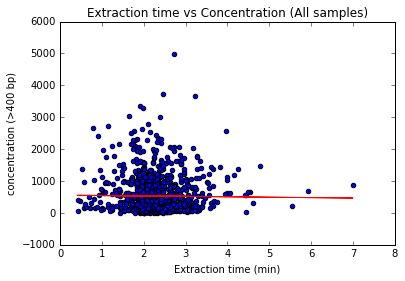

In [49]:
x = ps["Time spent extracting cytosol"]
y = ps[">400"]
plt.scatter(x,y)
plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
#ps.plot(kind = "scatter", x = "Time spent extracting cytosol", y = ">400")

In [22]:
ps_pass = ps[ps["SM_QC_PF"] == "pass"]
ps_pass.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF,cytosol extraction time bins
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass,2
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass,2
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass,2
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass,2
3175,2017-01-11,Gad2-IRES-Cre;Ai14-293418.06.02.01,Partial-Nucleus,2.350000,12.116667,148.0,pass,2


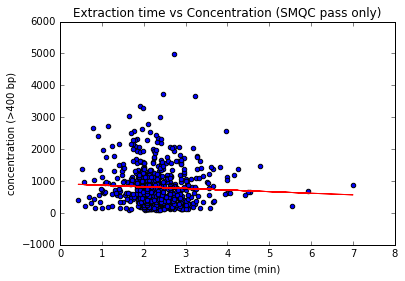

In [50]:
x = ps_pass["Time spent extracting cytosol"]
y = ps_pass[">400"]
plt.scatter(x,y)
plt.title('Extraction time vs Concentration (SMQC pass only)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
plt.savefig('extraction_vs_conc.png')

In [50]:
zero_one = ps[ps["cytosol extraction time bins"] == 0]
z_1_total = zero_one["cytosol extraction time bins"].count()
z_1_total

23

In [52]:
zero_one_pass = zero_one[zero_one["SM_QC_PF"] == "pass"]
z_1_pass = zero_one_pass["SM_QC_PF"].count()
z_1_pass

15

In [55]:
z_1_pp = float(z_1_pass) / z_1_total
print "0 to 1 minute pass percentage =", z_1_pp

0 to 1 minute pass percentage = 0.652173913043


In [57]:
one_two = ps[ps["cytosol extraction time bins"] == 1]
o_2_total = one_two["cytosol extraction time bins"].count()
o_2_total

254

In [68]:
one_two_pass = one_two[one_two["SM_QC_PF"] == "pass"]
o_2_pass = one_two_pass["SM_QC_PF"].count()
o_2_pass

171

In [73]:
o_2_pp = float(o_2_pass) / o_2_total
print "1 to 2 minute pass percentage =", o_2_pp

1 to 2 minute pass percentage = 0.673228346457


In [71]:
two_three = ps[ps["cytosol extraction time bins"] == 2]
t_3_total = two_three["cytosol extraction time bins"].count()
t_3_total

778

In [74]:
two_three_pass = two_three[two_three["SM_QC_PF"] == "pass"]
t_3_pass = two_three_pass["SM_QC_PF"].count()
t_3_pass

423

In [75]:
t_3_pp = float(t_3_pass) / t_3_total
print "two to three minute pass percentage =", t_3_pp

two to three minute pass percentage = 0.543701799486


In [26]:
three_four = ps[ps["cytosol extraction time bins"] == 3]
t_4_total = three_four["cytosol extraction time bins"].count()
t_4_total

94

In [27]:
three_four_pass = three_four[three_four["SM_QC_PF"] == "pass"]
t_4_pass = three_four_pass["SM_QC_PF"].count()
t_4_pass

62

In [31]:
t_4_pp = float(t_4_pass) / t_4_total
print "three to fourt minute pass percentage =", t_4_pp

three to fourt minute pass percentage = 0.659574468085


In [32]:
four_five = ps[ps["cytosol extraction time bins"]  == 4]
f_5_total = four_five["cytosol extraction time bins"].count()
f_5_total

11

In [34]:
four_five_pass = four_five[four_five["SM_QC_PF"] == "pass"]
f_5_pass = four_five_pass["SM_QC_PF"].count()
f_5_pass

8

In [36]:
f_5_pp = float(f_5_pass) / f_5_total
print "four to five minute pass percentage =", f_5_pp

four to five minute pass percentage = 0.727272727273


In [37]:
five_six = ps[ps["cytosol extraction time bins"] == 5]
f_5_total = five_six["cytosol extraction time bins"].count()
f_5_total

2